In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
breadbasket = pd.read_csv('./BreadBasket_DMS.csv')
breadbasket.dtypes

Date           object
Time           object
Transaction     int64
Item           object
dtype: object

In [5]:
breadbasket.head()

Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam

In [6]:
breadbasket['DateTime'] = pd.to_datetime(breadbasket.Date +' '+ breadbasket.Time) 

In [7]:
breadbasket.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [10]:
pd.options.display.max_rows = None
breadbasket.Item.value_counts()

Coffee                           5471
Bread                            3325
Tea                              1435
Cake                             1025
Pastry                            856
NONE                              786
Sandwich                          771
Medialuna                         616
Hot chocolate                     590
Cookies                           540
Brownie                           379
Farm House                        374
Muffin                            370
Alfajores                         369
Juice                             369
Soup                              342
Scone                             327
Toast                             318
Scandinavian                      277
Truffles                          193
Coke                              185
Spanish Brunch                    172
Fudge                             159
Baguette                          152
Jam                               149
Tiffin                            146
Mineral wate

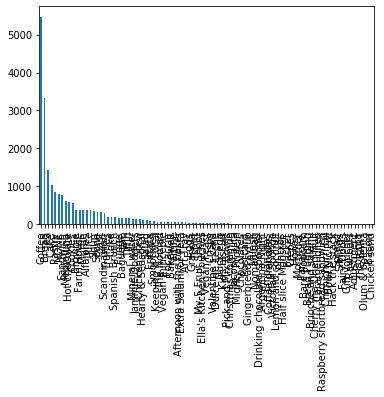

In [9]:
breadbasket.Item.value_counts().plot(kind='bar')

### Crear labels para one hot encoding

In [11]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']

In [12]:
other_food = [
    x for x in breadbasket.Item.unique()
        if x not in beverage and x not in other and x not in kids and x not in snacks 
                and x not in bread and x not in breakfast_pastry 
                and x not in dessert and x not in condiments 
                and x not in breakfast and x not in lunch
]

In [13]:
breadbasket['beverage'] = np.where(breadbasket.Item.isin(beverage),1,0)
breadbasket['other'] = np.where(breadbasket.Item.isin(other),1,0)
breadbasket['kids'] = np.where(breadbasket.Item.isin(kids),1,0)
breadbasket['snacks'] = np.where(breadbasket.Item.isin(snacks),1,0)
breadbasket['bread'] = np.where(breadbasket.Item.isin(bread),1,0)
breadbasket['breakfast_pastry'] = np.where(breadbasket.Item.isin(breakfast_pastry),1,0)
breadbasket['dessert'] = np.where(breadbasket.Item.isin(dessert),1,0)
breadbasket['condiments'] = np.where(breadbasket.Item.isin(condiments),1,0)
breadbasket['breakfast'] = np.where(breadbasket.Item.isin(breakfast),1,0)
breadbasket['lunch'] = np.where(breadbasket.Item.isin(lunch),1,0)
breadbasket['other_food'] = np.where(breadbasket.Item.isin(other_food),1,0)

In [14]:
breadbasket.head()

Date      Time  Transaction           Item            DateTime  \
0  2016-10-30  09:58:11            1          Bread 2016-10-30 09:58:11   
1  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
2  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
3  2016-10-30  10:07:57            3  Hot chocolate 2016-10-30 10:07:57   
4  2016-10-30  10:07:57            3            Jam 2016-10-30 10:07:57   

   beverage  other  kids  snacks  bread  breakfast_pastry  dessert  \
0         0      0     0       0      1                 0        0   
1         0      0     0       0      1                 0        0   
2         0      0     0       0      1                 0        0   
3         1      0     0       0      0                 0        0   
4         0      0     0       0      0                 0        0   

   condiments  breakfast  lunch  other_food  
0           0          0      0           0  
1           0          0      0           0  
2           0          0      0           0  
3           0          0      0           0  
4           1          0      0           0

### Agrupación de transacciones

In [15]:
bread_by_group = breadbasket.groupby(['Transaction','DateTime']).sum()

In [17]:
bread_by_group

beverage  other  kids  snacks  bread  \
Transaction DateTime                                                    
1           2016-10-30 09:58:11         0      0     0       0      1   
2           2016-10-30 10:05:34         0      0     0       0      2   
3           2016-10-30 10:07:57         1      0     0       0      0   
4           2016-10-30 10:08:41         0      0     0       0      0   
5           2016-10-30 10:13:03         1      0     0       0      1   
6           2016-10-30 10:16:55         0      0     0       0      0   
7           2016-10-30 10:19:12         2      0     0       0      0   
8           2016-10-30 10:20:51         0      0     0       0      1   
9           2016-10-30 10:21:59         0      0     0       0      1   
10          2016-10-30 10:25:58         0      0     0       0      1   
11          2016-10-30 10:27:21         0      1     0       0      2   
12          2016-10-30 10:30:14         2      0     0       0      0   
13          2016-10-30 10:31:24         1      0     0       0      1   
14          2016-10-30 10:32:46         0      0     0       0      1   
15          2016-10-30 10:34:36         1      2     0       0      1   
16          2016-10-30 10:37:08         1      0     0       0      1   
17          2016-10-30 10:38:04         1      0     0       0      0   
18          2016-10-30 10:41:56         0      0     0       0      0   
19          2016-10-30 10:43:08         0      0     0       0      1   
20          2016-10-30 10:45:22         0      0     0       0      1   
21          2016-10-30 10:49:29         2      0     0       0      1   
22          2016-10-30 10:52:15         0      0     0       0      0   
23          2016-10-30 10:53:49         0      0     0       0      1   
24          2016-10-30 10:54:33         0      0     0       0      1   
25          2016-10-30 10:55:22         0      0     0       0      1   
26          2016-10-30 10:56:08         0      0     0       0      0   
27          2016-10-30 11:02:19         0      0     0       0      1   
28          2016-10-30 11:03:24         1      0     0       0      1   
29          2016-10-30 11:05:30         0      1     0       0      1   
30          2016-10-30 11:07:19         0      0     0       0      1   
31          2016-10-30 11:12:56         0      0     0       0      0   
32          2016-10-30 11:16:15         0      0     0       0      1   
33          2016-10-30 11:22:49         1      0     0       0      0   
34          2016-10-30 11:25:45         1      0     0       0      0   
35          2016-10-30 11:27:34         0      0     0       0      1   
36          2016-10-30 11:33:08         1      0     0       0      1   
37          2016-10-30 11:37:10         1      1     0       0      1   
38          2016-10-30 11:42:40         1      0     0       0      1   
39          2016-10-30 11:44:31         0      0     0       0      1   
40          2016-10-30 11:55:51         2      1     0       0      0   
41          2016-10-30 11:57:06         0      0     0       0      1   
42          2016-10-30 11:57:45         1      0     0       0      1   
43          2016-10-30 12:00:22         0      0     0       0      1   
44          2016-10-30 12:05:47         1      0     0       0      0   
45          2016-10-30 12:08:36         2      0     0       0      0   
46          2016-10-30 12:09:04         1      0     0       0      0   
47          2016-10-30 12:15:29         1      0     1       0      1   
48          2016-10-30 12:17:02         1      0     0       0      0   
49          2016-10-30 12:23:01         2      0     0       0      0   
50          2016-10-30 12:25:11         0      0     0       0      1   
51          2016-10-30 12:26:58         0      0     0       0      1   
52          2016-10-30 12:28:07         0      0     0       0      1   
54          2016-10-30 12:33:08         0      0     0       0      1   
55          2016-1

In [18]:
bread_by_group.reset_index(level=['DateTime'], inplace = True)

In [19]:
bread_by_group['hour'] = bread_by_group.DateTime.dt.hour
bread_by_group['day'] = bread_by_group.DateTime.dt.day_name()
bread_by_group.day.value_counts()

Saturday     2068
Friday       1488
Sunday       1264
Thursday     1252
Tuesday      1203
Monday       1135
Wednesday    1121
Name: day, dtype: int64

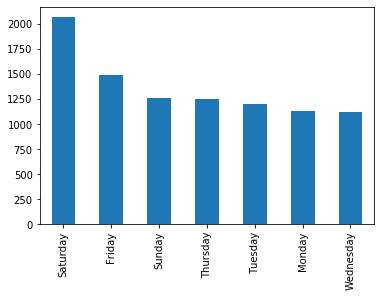

In [20]:
bread_by_group.day.value_counts().plot(kind='bar')

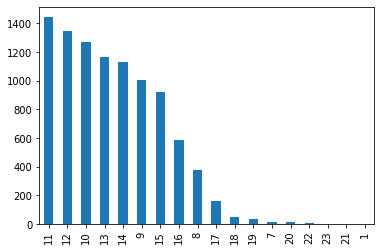

In [21]:
bread_by_group.hour.value_counts().plot(kind='bar')

In [23]:
bread_by_group.shape

(9531, 14)

In [24]:
bread_by_group.head()

DateTime  beverage  other  kids  snacks  bread  \
Transaction                                                             
1           2016-10-30 09:58:11         0      0     0       0      1   
2           2016-10-30 10:05:34         0      0     0       0      2   
3           2016-10-30 10:07:57         1      0     0       0      0   
4           2016-10-30 10:08:41         0      0     0       0      0   
5           2016-10-30 10:13:03         1      0     0       0      1   

             breakfast_pastry  dessert  condiments  breakfast  lunch  \
Transaction                                                            
1                           0        0           0          0      0   
2                           0        0           0          0      0   
3                           0        1           1          0      0   
4                           1        0           0          0      0   
5                           1        0           0          0      0   

             other_food  hour     day  
Transaction                            
1                     0     9  Sunday  
2                     0    10  Sunday  
3                     0    10  Sunday  
4                     0    10  Sunday  
5                     0    10  Sunday

In [25]:
bread_by_days = pd.get_dummies(data=bread_by_group,columns=['day'])
bread_by_days.drop(columns='DateTime',inplace=True,axis=1)

In [27]:
bread_by_days.head()

beverage  other  kids  snacks  bread  breakfast_pastry  dessert  \
Transaction                                                                    
1                   0      0     0       0      1                 0        0   
2                   0      0     0       0      2                 0        0   
3                   1      0     0       0      0                 0        1   
4                   0      0     0       0      0                 1        0   
5                   1      0     0       0      1                 1        0   

             condiments  breakfast  lunch  other_food  hour  day_Friday  \
Transaction                                                               
1                     0          0      0           0     9           0   
2                     0          0      0           0    10           0   
3                     1          0      0           0    10           0   
4                     0          0      0           0    10           0   
5                     0          0      0           0    10           0   

             day_Monday  day_Saturday  day_Sunday  day_Thursday  day_Tuesday  \
Transaction                                                                    
1                     0             0           1             0            0   
2                     0             0           1             0            0   
3                     0             0           1             0            0   
4                     0             0           1             0            0   
5                     0             0           1             0            0   

             day_Wednesday  
Transaction                 
1                        0  
2                        0  
3                        0  
4                        0  
5                        0

### Uso de PCA

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components = 4)


In [30]:
principalComponents = pca.fit_transform(bread_by_days)

In [31]:
principalDf = pd.DataFrame(principalComponents, columns = [f'pc_{i+1}' for i in range(4)])

In [32]:
principalDf.head()

pc_1      pc_2      pc_3      pc_4
0  3.197413 -0.926669  0.244933  0.005978
1  2.227896 -1.274346  1.183370 -0.159233
2  2.107647  0.424885 -0.219763  0.879847
3  2.198960 -0.580674 -0.783352 -0.031006
4  2.206812  0.037385  0.443747 -0.333645

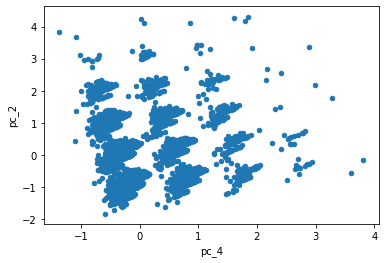

In [44]:
principalDf.plot.scatter(x='pc_4',y='pc_2')

Se hacen 5 cluster con las 4 features de PCA, los datos están mapeados con esas distribuciones

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

In [47]:
bread_by_cluster = kmeans.fit(principalDf)
bread_by_cluster.cluster_centers_

array([[-1.34051397e+00,  1.09988201e-02, -3.45543514e-02,
        -2.55837181e-03],
       [ 3.08321621e+00, -2.80908449e-01,  4.10020431e-02,
         6.69453610e-03],
       [-3.60462547e+00, -1.92471486e-02,  3.54627364e-02,
         5.46510488e-03],
       [ 1.40362304e+00,  8.46243008e-01, -5.78133842e-02,
        -3.51370247e-02],
       [ 5.58935483e-01, -5.02562126e-01,  1.93902847e-02,
         2.44497071e-02]])

Regresar a las labels originales

In [51]:
bread_by_days['labels'] = bread_by_cluster.fit_predict(principalDf)
bread_by_days.reset_index('Transaction', inplace=True)
bread_merged = pd.merge(breadbasket, bread_by_days[['Transaction', 'labels']], on='Transaction', how='outer')
bread_merged.head()

Date      Time  Transaction           Item            DateTime  \
0  2016-10-30  09:58:11            1          Bread 2016-10-30 09:58:11   
1  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
2  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
3  2016-10-30  10:07:57            3  Hot chocolate 2016-10-30 10:07:57   
4  2016-10-30  10:07:57            3            Jam 2016-10-30 10:07:57   

   beverage  other  kids  snacks  bread  breakfast_pastry  dessert  \
0         0      0     0       0      1                 0        0   
1         0      0     0       0      1                 0        0   
2         0      0     0       0      1                 0        0   
3         1      0     0       0      0                 0        0   
4         0      0     0       0      0                 0        0   

   condiments  breakfast  lunch  other_food  labels  
0           0          0      0           0       2  
1           0          0      0           0       2  
2           0          0      0           0       2  
3           0          0      0           0       2  
4           1          0      0           0       2

In [54]:
pd.crosstab(bread_by_days.hour,bread_by_days.labels)

labels    0    1     2     3     4
hour                              
1         0    0     1     0     0
7         0    0    16     0     0
8         0    0   375     0     0
9        25    0   982     0     0
10      263    0  1004     0     0
11      334    0     0     0  1111
12      267    0     0     0  1080
13       33    0     0  1130     0
14        2    0     0  1128     0
15        0  924     0     0     0
16        0  583     0     0     0
17        0  160     0     0     0
18        0   52     0     0     0
19        0   34     0     0     0
20        0   15     0     0     0
21        0    2     0     0     0
22        0    7     0     0     0
23        0    3     0     0     0

In [55]:
a = bread_merged.groupby(['labels']).Item.value_counts()
b = a.to_frame("counts").reset_index()
b.set_index("Item", inplace=True)
b.groupby('labels').counts.nlargest(5)

labels  Item         
0       Coffee           1372
        Tea               290
        Hot chocolate     177
        Bread             168
        Pastry            149
1       Coffee            927
        Bread             560
        Tea               382
        Cake              328
        Hot chocolate     183
2       Coffee           1163
        Bread            1027
        Pastry            389
        Medialuna         260
        Tea               198
3       Coffee           1188
        Bread             677
        Tea               402
        Sandwich          381
        Cake              302
4       Bread             893
        Coffee            821
        NONE              185
        Cake              164
        Pastry            164
Name: counts, dtype: int64